In [1]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [2]:
df1 = pd.read_csv('C:/Users/Inpreet Singh/Downloads/datasets/New folder/Bengaluru_House_Data.csv')# Dataset is now stored in a Pandas Dataframe

In [3]:
df1.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [4]:
df2=df1.drop(columns=['area_type','availability','society','balcony'],axis=1)
df2.shape

(13320, 5)

In [5]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df3.shape,df2.shape

((13246, 5), (13320, 5))

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [13]:
df3[~df3['total_sqft'].apply(is_float)].head(10) 

# Now we can check value which are not float value presnt in total_sqft feature.,we deal only those values which are not float 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


 we can see "2100 - 2850" this kind of data present in our dataset ,so we can correct this data for better accuracy. we can take the mean of two numbers,it is part of data cleaning

In [14]:
def convrt_sqft_num(x):
  token=x.split('-')
  if len(token)==2:
    return (float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [15]:
convrt_sqft_num('1042 - 1105')

1073.5

In [16]:
df4=df3.copy()

In [17]:
df4['total_sqft']=df4['total_sqft'].apply(convrt_sqft_num)


In [18]:
df4['total_sqft'].iloc[648]

1100.0

In [19]:
df3.shape,df4.shape

((13246, 6), (13246, 6))

In [20]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [21]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

Now in our dataset some null values are occur becuase "34.46Sq. Meter" this kind of val present in dataset,so we can fill thses vlaue,otherwise drop that rows

In [22]:
df4.loc[648]

location        Arekere
size          9 Bedroom
total_sqft          NaN
bath                  9
price               265
bhk                   9
Name: 648, dtype: object

In [23]:
df4.dropna(inplace=True)

In [24]:
price_=df4['price']
price_val=price_.to_numpy()*100000

In [25]:
total_val=df4['total_sqft']
total_area=total_val.to_numpy()
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [26]:
price_per_sqft=price_val/total_area

In [27]:
df4['price_per_sqft']=price_per_sqft.tolist()

In [28]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
df4.shape

(13200, 7)

In [30]:
corr=df4[['bhk','total_sqft','price']]

In [31]:
#  Now we can check the correlation b/w features three features , In corr, we can find the correlation by pearson method

In [32]:
corr.corr()

,bhk,total_sqft,price
bhk,1.000000,0.346013,0.396883
total_sqft,0.346013,1.000000,0.574330
price,0.396883,0.574330,1.000000


In [33]:
# correlation coefficent using scipy stats
# from scipy import stats

# stats.pearsonr(corr.Cylinders, cars.Acceleration)

# Correlation 

Text(0.5, 1, 'Seaborn')

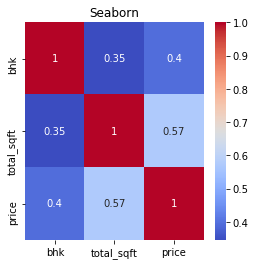

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap(corr.corr(), annot=True,cmap="coolwarm").set_title('Seaborn')

c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


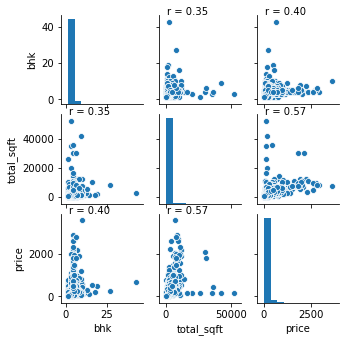

In [35]:
# add correlation coefficient to plot
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy=(0.1, 1.0), xycoords=ax.transAxes)

# pair_plot = seaborn.pairplot(cars_pairplot, height=1.5)
pair_plot = sns.pairplot(corr, size=1.5);
pair_plot.map_lower(corrfunc);
pair_plot.map_upper(corrfunc);

In [36]:
len(df4.location.unique())

1298

Now here is the biggest problem in features category, we can see so many unique classes present in location feature, it is difficult for model to handle 1298 column ,so for this reason we perform some task on it.

In [37]:
df4.location=df4.location.apply(lambda x:x.strip()) # strip method can used to remove the unwanted space from wright and left from str, lstrip(),rstrip(),is also used

In [38]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [39]:
location_stats=df4.groupby('location')['location'].agg('count').sort_values( ascending=False)
location_stats

location
Whitefield                                            533
Sarjapur  Road                                        392
Electronic City                                       304
Kanakpura Road                                        264
Thanisandra                                           235
Yelahanka                                             210
Uttarahalli                                           186
Hebbal                                                176
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Bannerghatta Road                                     151
Hennur Road                                           150
7th Phase JP Nagar                                    148
Haralur Road                                          141
Electronic City Phase II                              131
Rajaji Nagar                                          106
Chandapura                                             98
Bella

In [40]:
len(location_stats[location_stats<=10]) 

1047

count of 1047 categories are less than 10, so we can convert it into one variable for better accuracy

In [41]:
location_stats_less_10=location_stats[location_stats<=10]

In [42]:
df4.location=df4.location.apply(lambda x: 'others' if x in location_stats_less_10 else x)

In [43]:
len(df4.location.unique())    
# only 241 unique value are present in location features

241

In [44]:
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [45]:
col_study=['total_sqft','bath','price','bhk']

c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


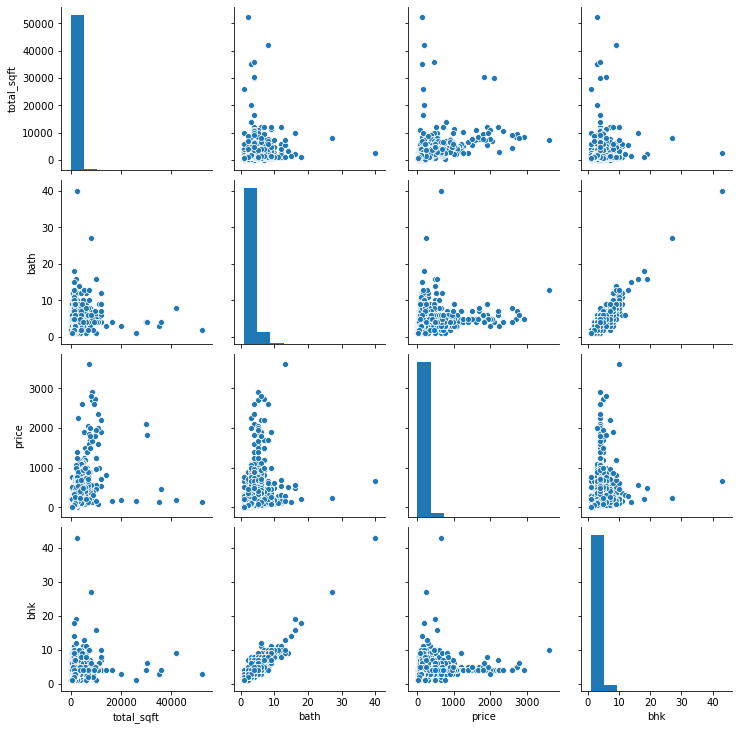

In [46]:
sns.pairplot(df4[col_study],size=2.5)
plt.show()

In [47]:
df4.corr()

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


Text(0.5, 1, 'Seaborn')

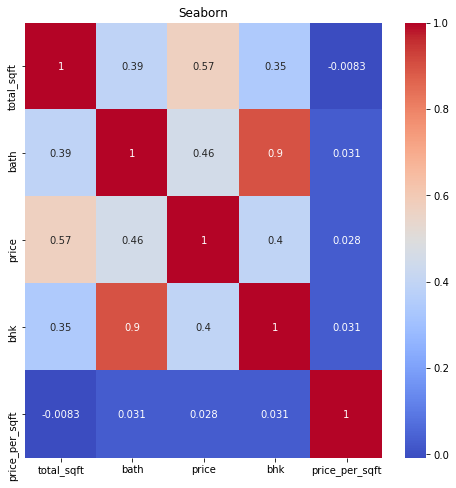

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(df4.corr(), annot=True, cmap="coolwarm").set_title('Seaborn')


# Outlier check

In [49]:
# function to create histogram, Q-Q plot and boxplot

# for Q-Q plots
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* bath *******


c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


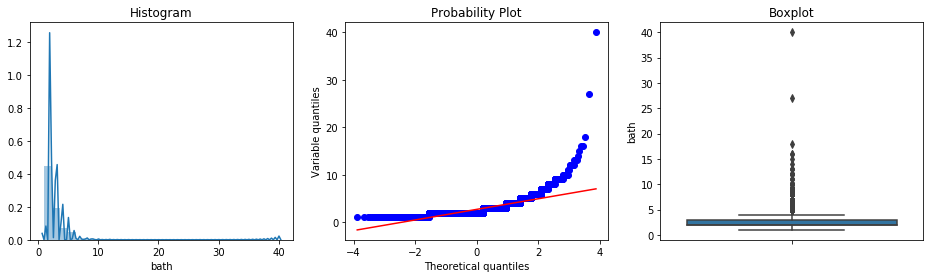

******* total_sqft *******


c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


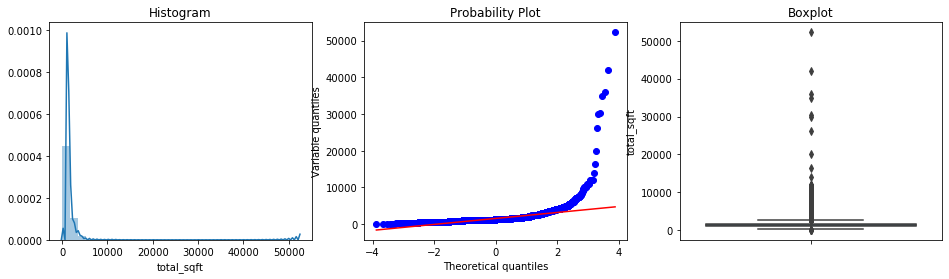

******* bhk *******


c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


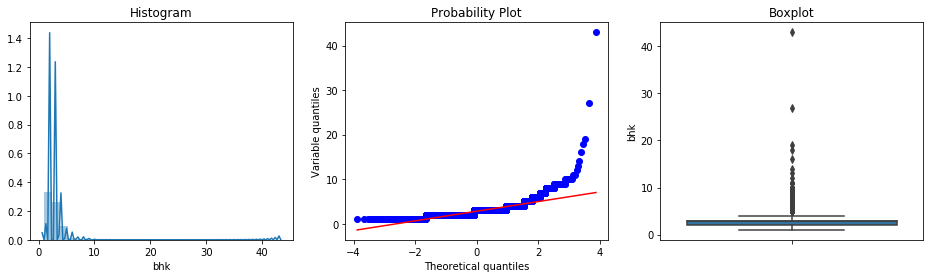

******* price *******


c:\users\inpreet singh\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


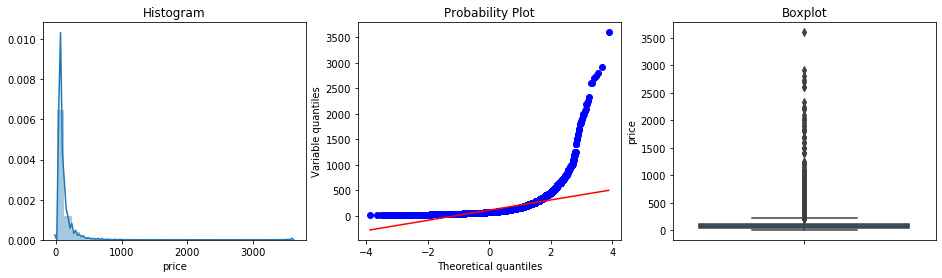

In [50]:
num_var = ["bath","total_sqft","bhk","price"]
for var in num_var:
  print("******* {} *******".format(var))
  diagnostic_plots(df4, var)

  # here we observe outlier using histogram,, qq plot and boxplot 

In [51]:
# we can see the outlier in dataset,so we can remove outlier from our dataset,with different method.

In [52]:
outlier=[]
def detect_outlier(data):
    
    threshold=1
    mean=np.mean(data)
    stand_dev=np.mean(data)
    
    for i in data:
        z_score=(i-mean)/stand_dev
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier
    
    

In [53]:
detect_outlier(df4['bhk'])[0:5]

[6, 8, 6, 8, 8]

In [54]:
outlier.sort(reverse=True)


In [55]:
len(outlier)

486

In [56]:
outlier[0:9]

[43, 27, 19, 18, 16, 14, 13, 12, 11]

In [57]:
df4.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920759e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [58]:
max_threshold=df4['bhk'].quantile(.99)
print(max_threshold)

8.0


In [59]:
min_threshold=df4['bhk'].quantile(0)
print(min_threshold)

1.0


In [60]:
df4[df4['bhk']<=max_threshold]['bhk'].max()

8

In [61]:
df4[df4['bhk']<=min_threshold]['bhk'].min()

1

In [62]:
df5 = df4[(df4.bhk<max_threshold) & (df4.bhk>min_threshold)]
df5.shape

(12394, 7)

In [63]:
df4.shape

(13200, 7)

In [64]:
df5.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12394.000000,12394.000000,12394.000000,12394.000000,1.239400e+04
mean,1584.127925,2.696627,113.926465,2.808859,7.920369e+03
std,1158.031549,1.061618,146.906408,0.960370,1.101072e+05
min,1.000000,1.000000,10.500000,2.000000,2.678298e+02
25%,1128.000000,2.000000,51.982500,2.000000,4.276978e+03
50%,1300.000000,2.000000,74.000000,3.000000,5.429218e+03
75%,1697.000000,3.000000,120.000000,3.000000,7.279007e+03
max,52272.000000,9.000000,2912.000000,7.000000,1.200000e+07


In [65]:
max_threshold1=df4['price_per_sqft'].quantile(.999)
print(max_threshold1)

min_threshold1=df4['price_per_sqft'].quantile(0.001)
print(min_threshold1)

50959.580419581405
1366.755485893417


In [66]:
min_thresold, max_thresold = df4.price_per_sqft.quantile([0.001, 0.95])
min_thresold, max_thresold

(1366.755485893417, 15312.121212121196)

In [67]:
df4[df4.price_per_sqft < min_thresold]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
674,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371.428571
810,others,4 Bedroom,10961.0,4.0,80.0,4,729.860414
1894,others,3 Bedroom,52272.0,2.0,140.0,3,267.829813
2421,others,4 Bedroom,2000.0,3.0,25.0,4,1250.000000
3976,others,1 BHK,1500.0,1.0,19.5,1,1300.000000
5393,others,9 BHK,42000.0,8.0,175.0,9,416.666667
5469,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250.000000
5652,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363.636364
7242,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573.921028
7947,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875.000000


In [68]:
df4[df4.price_per_sqft > max_thresold]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.0,4,1.818182e+04
9,others,6 Bedroom,1020.00,6.0,370.0,6,3.627451e+04
45,HSR Layout,8 Bedroom,600.00,9.0,200.0,8,3.333333e+04
48,KR Puram,2 Bedroom,800.00,1.0,130.0,2,1.625000e+04
70,others,3 Bedroom,500.00,3.0,100.0,3,2.000000e+04
89,Rajaji Nagar,6 Bedroom,710.00,6.0,160.0,6,2.253521e+04
133,others,4 Bedroom,1200.00,4.0,210.0,4,1.750000e+04
149,others,6 Bedroom,1034.00,5.0,185.0,6,1.789168e+04
159,Mahalakshmi Layout,4 Bedroom,3750.00,4.0,760.0,4,2.026667e+04
185,others,3 Bedroom,1846.00,3.0,300.0,3,1.625135e+04


In [69]:
df_after_oulier = df4[(df4.price_per_sqft<max_thresold) & (df4.price_per_sqft>min_thresold)]


In [70]:
df_after_oulier.shape

(12526, 7)

In [71]:
df_after_oulier.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000
mean,1512.237677,2.602108,95.398415,2.711320,5961.410029
std,904.407495,1.194228,87.626986,1.132786,2552.032971
min,276.000000,1.000000,8.000000,1.000000,1379.310345
25%,1100.000000,2.000000,49.000000,2.000000,4210.526316
50%,1270.000000,2.000000,69.000000,3.000000,5296.196422
75%,1650.000000,3.000000,110.000000,3.000000,6904.761905
max,30400.000000,27.000000,2100.000000,27.000000,15311.004785


In [72]:
len(df_after_oulier.location.unique())

241

In [73]:
df_after_oulier.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [74]:
df_after_oulier[df_after_oulier.total_sqft/df_after_oulier.bhk<300].shape


(516, 7)

In [75]:
df_after_oulier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [76]:
new_df = df_after_oulier[~(df_after_oulier.total_sqft/df_after_oulier.bhk<300)]
new_df.shape

(12010, 7)

In [77]:
new_df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [78]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [79]:
new_df2 = remove_pps_outliers(new_df)
new_df2.shape

(9015, 7)

In [80]:
new_df2.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

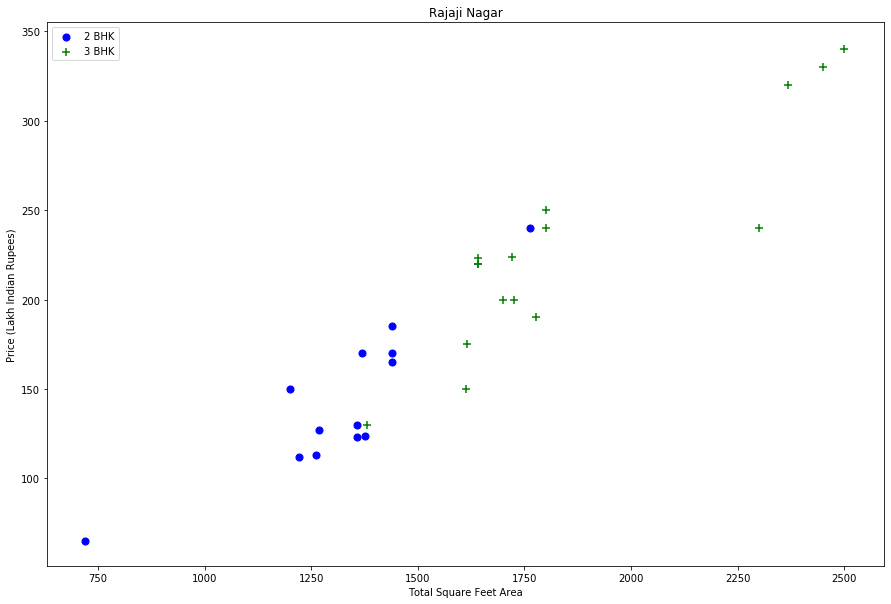

In [81]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(new_df2,"Rajaji Nagar")

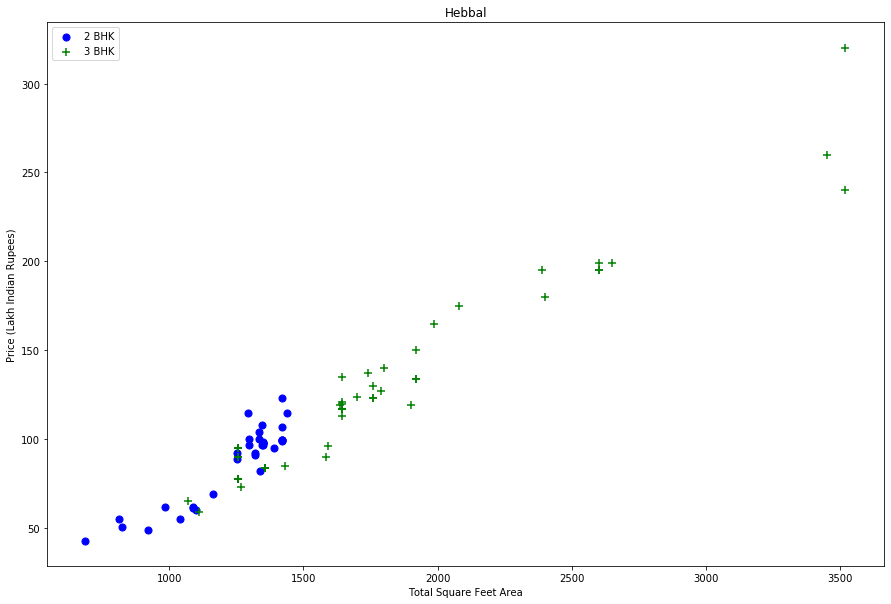

In [82]:
plot_scatter_chart(new_df2,"Hebbal")


In [83]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [84]:
df8 = remove_bhk_outliers(new_df2)
# df8 = df7.copy()
df8.shape

(6514, 7)

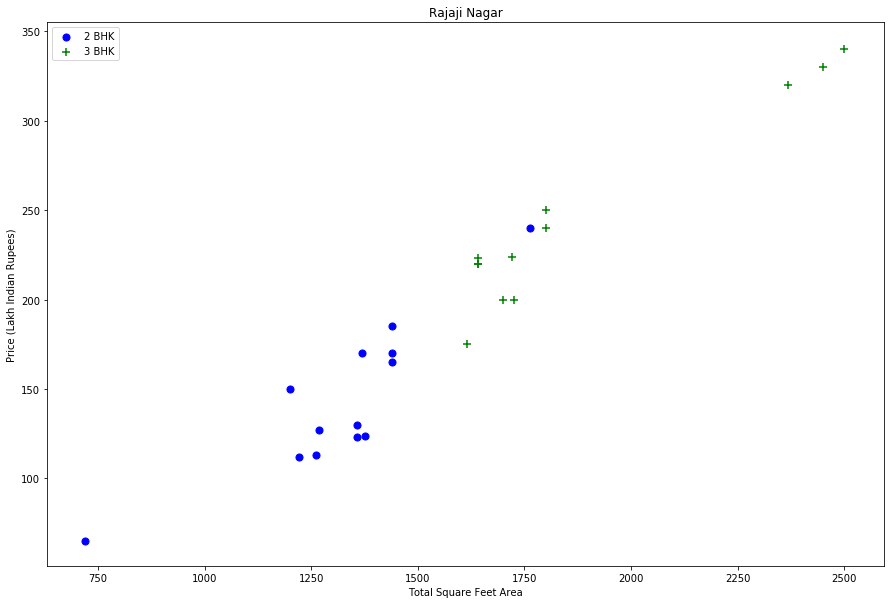

In [85]:
plot_scatter_chart(df8,"Rajaji Nagar")


Text(0, 0.5, 'Count')

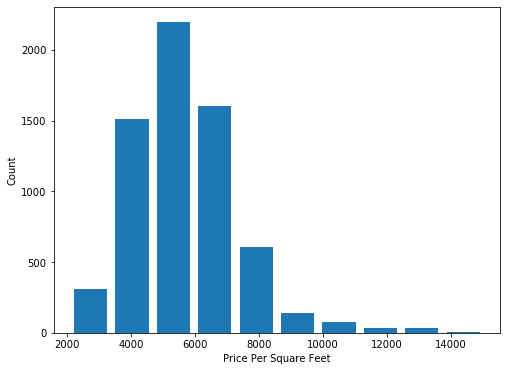

In [86]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (8,6)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [87]:
df8.bath.unique()


array([3.000000, 2.000000, 4.000000, 5.000000, 8.000000, 1.000000,
       6.000000, 7.000000, 9.000000, 12.000000, 16.000000, 13.000000])

In [88]:
df8[df8.bath>10]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
4782,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7641,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
7700,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
8543,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [89]:
df8[df8.bath>df8.bhk+2]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1493,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4743,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6104,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7580,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [90]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(6457, 7)

Text(0, 0.5, 'Count')

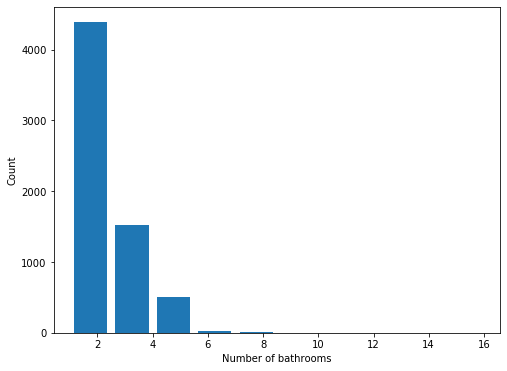

In [91]:
plt.hist(df9.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [92]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1200.0,2.0,130.0,3


In [93]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [94]:
df10.shape,dummies.shape

((6457, 5), (6457, 240))

In [95]:
dummies.drop(columns='others',inplace=True)

In [96]:
df11 = pd.concat([df10,dummies],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [97]:
df12=df11.drop(columns='location',axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X=df12.drop(columns='price',axis=1)
y=df12['price']
print(X.shape)
print(y.shape)

print(df1.shape)

(6457, 242)
(6457,)
(13320, 9)


In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [126]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (5165, 242)
X_test (1292, 242)
y_train (5165,)
y_test (1292,)


In [102]:
from sklearn.preprocessing import StandardScaler 

In [103]:
sc=StandardScaler()

In [104]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [105]:
X_train=sc.transform(X_train)

In [106]:
X_test=sc.transform(X_test)

In [107]:
#  Now we done standard sclaing ,its time to train our model

In [108]:
from sklearn.linear_model import LinearRegression


In [109]:
lr=LinearRegression()

In [110]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
lr.coef_

array([60.325264, 2.831232, -1.957832, 1.645509, 1.245865, -1.128593,
       2.250966, -0.415762, -1.296515, 0.583509, 0.561708, -2.025924,
       -1.283631, -0.644250, -1.766660, -1.775231, -0.252959, -0.102007,
       -0.626315, -1.406457, -1.895336, -1.380294, -1.520414, -0.719410,
       -0.545706, -1.600169, -1.052508, 0.546752, -0.694137, -1.535967,
       -0.157584, -0.071209, -0.895813, 1.639081, -0.664721, -1.674440,
       -1.840939, -0.309422, -0.243599, 0.471091, -1.401639, 2.172825,
       0.816174, -1.337550, -1.138429, -3.277772, -0.997514, 1.614921,
       -0.834813, -0.439422, -0.205114, 0.979621, -1.665825, -1.393674,
       -1.870382, -1.862821, 0.915624, 0.010849, -1.484639, -0.971136,
       0.560018, -2.975110, -2.250279, -2.626324, -2.015155, -1.246016,
       -0.944220, 3.562266, 0.594636, -0.435747, -0.582198, -1.302201,
       -1.041269, -1.446100, 0.572599, -0.898951, -1.870560, 1.094261,
       -1.632856, 0.083149, -1.899531, -3.689974, -1.297695, 3.039874,


In [112]:
lr.intercept_

86.08257308809293

In [113]:
lr.predict([X_test[1, :]])

array([62.948825])

In [114]:
y_pred=lr.predict(X_test)
y_pred

array([35.345450, 62.948825, 84.011387, ..., 70.267228, 84.505941,
       45.717303])

In [115]:
lr.score(X_test,y_test)

0.9208538468774916

In [127]:
from sklearn.metrics import mean_squared_error
import numpy as np
 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
 
print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  239.761442035185
RMSE =  15.484232045380391


In [116]:
from sklearn.linear_model import Ridge,Lasso

In [117]:
rd=Ridge()

In [118]:
rd.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
rd.score(X_test,y_test)

0.9208442498392523

In [120]:
rd=Ridge(alpha=2)
rd.fit(X_train,y_train)
rd.score(X_test,y_test)

0.9208345900271302

In [121]:
ls=Lasso()

In [122]:
ls.fit(X_train,y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [123]:
ls.score(X_test,y_test)

0.8898887898787509

In [124]:
ls2=Lasso(alpha=2)
ls2.fit(X_train,y_train)

ls2.score(X_test,y_test)


0.858996586201927